In [7]:
cd G:\CAR_DATASET

G:\CAR_DATASET


In [13]:
pwd

'G:\\CAR_DATASET'

In [14]:
import tensorflow

In [15]:
import pandas

# Import the ImageDataGenerator

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Level Image Preprocessing

In [17]:
imageSize = [224,224]
trainPath = 'G:\CAR_DATASET\Car damage\body\training'
testPath = 'G:\CAR_DATASET\Car damage\body\validation'
trainPath1 = 'G:\CAR_DATASET\Car damage\level\training'
testPath1 = 'G:\CAR_DATASET\Car damage\level\validation'

In [18]:
train_datagen =ImageDataGenerator(rescale=1./255,horizontal_flip=True,vertical_flip=False,zoom_range =0.2)

In [19]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [20]:
training_set=train_datagen.flow_from_directory(r"G:\CAR_DATASET\Car damage\body\training",target_size=(224,224),class_mode="categorical",batch_size=10)
test_set=test_datagen.flow_from_directory(r"G:\CAR_DATASET\Car damage\body\validation",target_size=(224,224),class_mode="categorical",batch_size=10)

Found 979 images belonging to 3 classes.
Found 171 images belonging to 3 classes.


In [21]:
training_set1=train_datagen.flow_from_directory(r"G:\CAR_DATASET\Car damage\level\training",target_size=(224,224),class_mode="categorical",batch_size=10)
test_set1=train_datagen.flow_from_directory(r"G:\CAR_DATASET\Car damage\level\validation",target_size=(224,224),class_mode="categorical",batch_size=10)

Found 979 images belonging to 3 classes.
Found 171 images belonging to 3 classes.


# Model Building

# Importing The model Building Libraries

In [22]:
from tensorflow.keras.layers import Dense,Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.applications.vgg16 import VGG16, preprocess_input
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

# Loading The model

In [23]:
vgg = VGG16(input_shape = imageSize +[3], weights = 'imagenet', include_top = False)

# Adding Flatten Layer

In [24]:
for layer in vgg.layers:
    layer.trainable = False
    x = Flatten()(vgg.output)

# Adding Output Layer

In [25]:
prediction = Dense(3, activation = 'softmax')(x)

# Creting a Model Object


In [26]:
model = Model(inputs = vgg.input, outputs = prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [27]:
model1 = Model(inputs = vgg.input, outputs = prediction)
model1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

# Compiling the model

In [29]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')
model1.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

# Train the model

In [30]:
import sys
#fit the model
r = model.fit_generator(training_set,validation_data=test_set,epochs=5,steps_per_epoch=979//10,validation_steps=171//10)

C:\Users\saurav kumar\AppData\Local\Temp\ipykernel_8616\3581602576.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(training_set,validation_data=test_set,epochs=5,steps_per_epoch=979//10,validation_steps=171//10)


Epoch 1/5
97/97 [==============================] - 213s 2s/step - loss: 1.0723 - accuracy: 0.5820 - val_loss: 0.9808 - val_accuracy: 0.5824
Epoch 2/5
97/97 [==============================] - 218s 2s/step - loss: 0.8623 - accuracy: 0.6574 - val_loss: 0.9626 - val_accuracy: 0.6294
Epoch 3/5
97/97 [==============================] - 229s 2s/step - loss: 0.5150 - accuracy: 0.8163 - val_loss: 0.9838 - val_accuracy: 0.6529
Epoch 4/5
97/97 [==============================] - 224s 2s/step - loss: 0.4958 - accuracy: 0.8019 - val_loss: 1.3388 - val_accuracy: 0.6059
Epoch 5/5
97/97 [==============================] - 220s 2s/step - loss: 0.4983 - accuracy: 0.8091 - val_loss: 1.1079 - val_accuracy: 0.6588


In [ ]:
r=model1.fit_generator(training_set1,validation_data=test_set1,epochs=5,steps_per_epoch=979//10,validation_steps=171//10)

# Save The model

In [35]:
model.save("car_damage.h5")

In [36]:
model1.save("car_damage1.h5")

# Test The Model

In [39]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [41]:
model = load_model("car_damage.h5")

In [42]:
model1 = load_model("car_damage1.h5")

In [44]:
img = image.load_img("G:/CAR_DATASET/Car damage/body/training/00-front/0001.jpeg",target_size=(224,224))

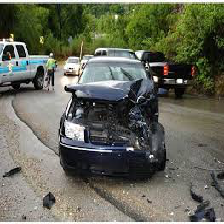

In [45]:
img

In [46]:
x = image.img_to_array(img)

In [47]:
x

array([[[253., 255., 250.],
        [253., 255., 250.],
        [252., 254., 249.],
        ...,
        [253., 253., 255.],
        [254., 255., 255.],
        [254., 255., 255.]],

       [[254., 255., 251.],
        [254., 255., 251.],
        [254., 255., 250.],
        ...,
        [252., 255., 246.],
        [243., 246., 237.],
        [249., 252., 243.]],

       [[135., 138., 131.],
        [135., 138., 131.],
        [135., 138., 131.],
        ...,
        [151., 161., 127.],
        [148., 158., 124.],
        [154., 164., 129.]],

       ...,

       [[134., 127., 119.],
        [144., 137., 129.],
        [131., 124., 116.],
        ...,
        [102.,  97.,  94.],
        [109., 104., 101.],
        [124., 119., 116.]],

       [[250., 243., 237.],
        [255., 254., 248.],
        [255., 250., 244.],
        ...,
        [255., 251., 248.],
        [248., 243., 240.],
        [255., 254., 251.]],

       [[255., 247., 244.],
        [255., 247., 244.],
        [253., 2

In [48]:
img1 = image.load_img("G:/CAR_DATASET/Car damage/level/validation/02-moderate/0035.JPEG",target_size=(64,64))

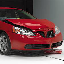

In [49]:
img1

In [50]:
x1 = image.img_to_array(img1)

In [51]:
x1

array([[[ 23.,  21.,  22.],
        [ 23.,  21.,  22.],
        [ 23.,  21.,  22.],
        ...,
        [128., 137., 134.],
        [129., 138., 135.],
        [132., 141., 138.]],

       [[ 19.,  17.,  18.],
        [ 19.,  17.,  18.],
        [ 25.,  23.,  24.],
        ...,
        [126., 135., 132.],
        [128., 137., 134.],
        [130., 139., 136.]],

       [[ 21.,  19.,  20.],
        [ 21.,  19.,  20.],
        [ 22.,  20.,  21.],
        ...,
        [124., 133., 130.],
        [126., 135., 132.],
        [129., 138., 135.]],

       ...,

       [[247., 247., 247.],
        [247., 247., 247.],
        [246., 246., 246.],
        ...,
        [248., 248., 248.],
        [249., 249., 249.],
        [251., 251., 251.]],

       [[247., 247., 247.],
        [247., 247., 247.],
        [247., 247., 247.],
        ...,
        [248., 248., 248.],
        [249., 249., 249.],
        [251., 251., 251.]],

       [[247., 247., 247.],
        [247., 247., 247.],
        [248., 2

In [52]:
pred = model.predict(x)

ValueError: in user code:

    File "C:\Users\saurav kumar\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\saurav kumar\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\saurav kumar\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\saurav kumar\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "C:\Users\saurav kumar\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\saurav kumar\AppData\Roaming\Python\Python39\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(32, 224, 3)


In [53]:
pred = model1.predict(x1)

ValueError: in user code:

    File "C:\Users\saurav kumar\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\saurav kumar\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\saurav kumar\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\saurav kumar\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "C:\Users\saurav kumar\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\saurav kumar\AppData\Roaming\Python\Python39\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_1" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(32, 64, 3)


In [54]:
x = np.expand_dims(x,axis=0)
x = np.expand_dims(x,axis=0)

In [55]:
x.ndim

5

In [56]:
pred=model.predict(x)

ValueError: in user code:

    File "C:\Users\saurav kumar\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\saurav kumar\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\saurav kumar\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\saurav kumar\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "C:\Users\saurav kumar\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\saurav kumar\AppData\Roaming\Python\Python39\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 1, 224, 224, 3)


In [57]:
pred=model.predict(x1)

ValueError: in user code:

    File "C:\Users\saurav kumar\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\saurav kumar\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\saurav kumar\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\saurav kumar\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "C:\Users\saurav kumar\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\saurav kumar\AppData\Roaming\Python\Python39\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(32, 64, 3)
